In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('healthcare_dataset.csv')

In [3]:
# Data Cleaning
# Standardize text columns
df['Gender'] = df['Gender'].str.title()
df['Admission Type'] = df['Admission Type'].str.title()
df['Medical Condition'] = df['Medical Condition'].str.title()

# Handle negative billing
df['Billing Amount'] = df['Billing Amount'].abs()

# Convert dates
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [4]:
# Calculate length of stay
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

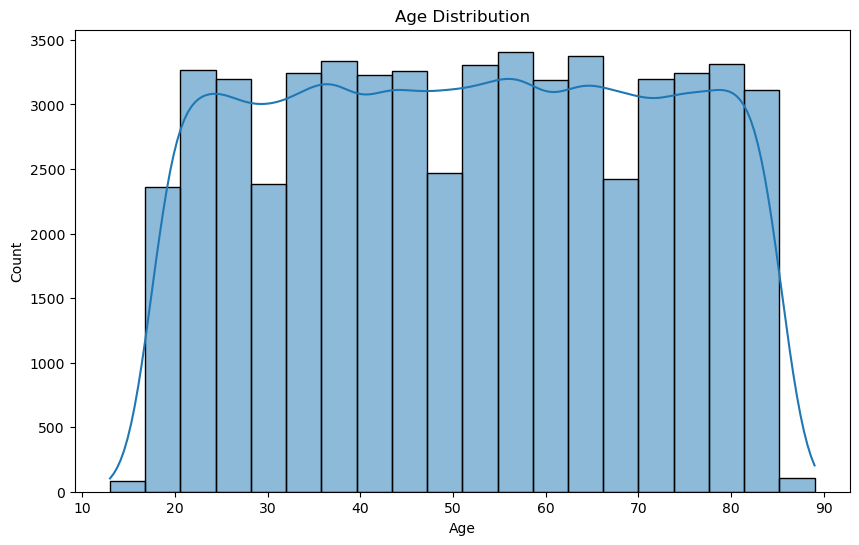

In [5]:
# Demographic Analysis
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

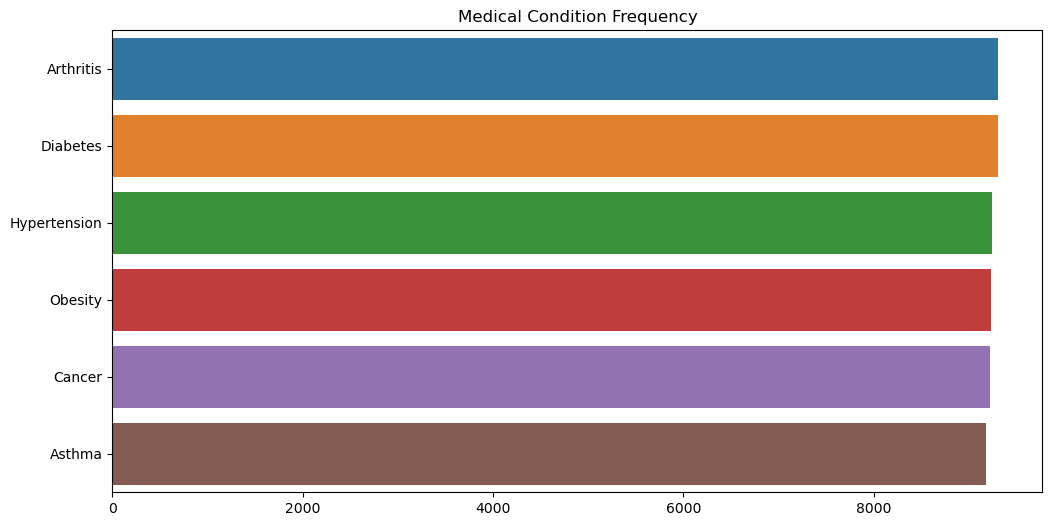

In [6]:
# Medical Condition Distribution
condition_counts = df['Medical Condition'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=condition_counts.values, y=condition_counts.index)
plt.title('Medical Condition Frequency')
plt.show()

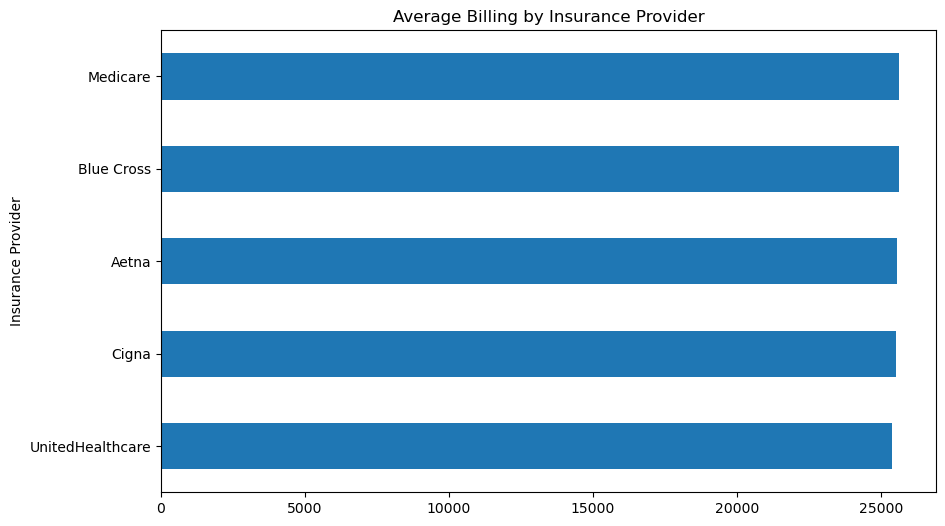

In [7]:
# Insurance Analysis
insurance_billing = df.groupby('Insurance Provider')['Billing Amount'].mean()
plt.figure(figsize=(10,6))
insurance_billing.sort_values().plot(kind='barh')
plt.title('Average Billing by Insurance Provider')
plt.show()

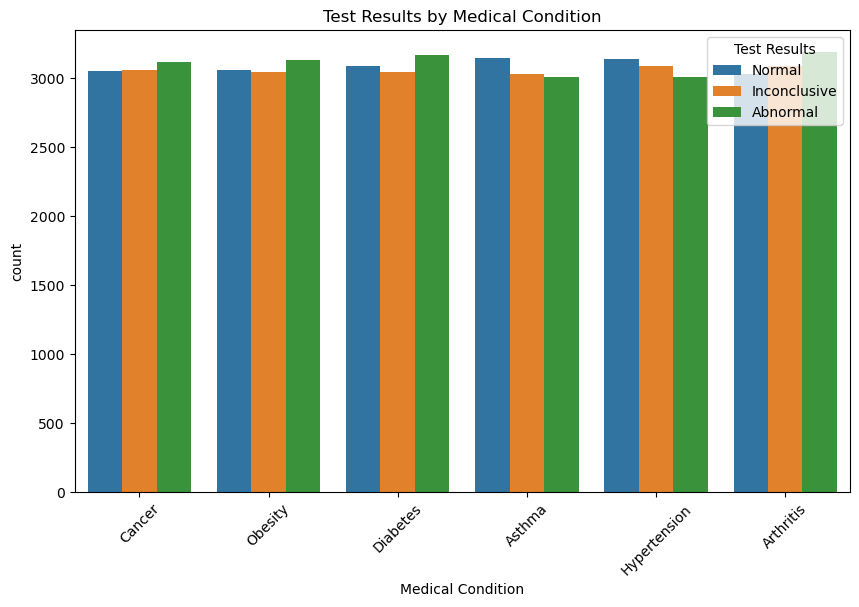

In [8]:
# Test Result Correlation
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Medical Condition', hue='Test Results')
plt.xticks(rotation=45)
plt.title('Test Results by Medical Condition')
plt.show()

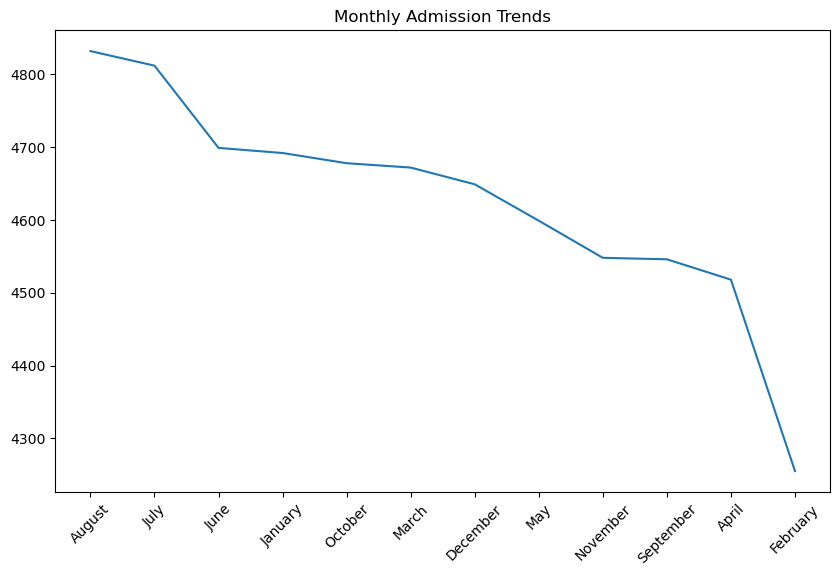

In [9]:
# Temporal Analysis
df['Admission Month'] = df['Date of Admission'].dt.month_name()
monthly_admissions = df['Admission Month'].value_counts()
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_admissions.index, y=monthly_admissions.values)
plt.title('Monthly Admission Trends')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Export cleaned data
df.to_csv('cleaned_healthcare_data.csv', index=False)